In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dataset = pd.read_csv("path.csv")

In [ ]:
dataset.head()

,ID,text,target
0,ynat-v1_train_00000,정i :파1 미사z KT( 이용기간 2e 단] Q분종U2보,4
1,ynat-v1_train_00001,K찰.국DLwo 로L3한N% 회장 2 T0&}송=,3
2,ynat-v1_train_00002,"m 김정) 자주통일 새,?r열1나가야1보",2
3,ynat-v1_train_00003,갤노트8 주말 27만대 개통…시장은 불법 보조금 얼룩,5
4,ynat-v1_train_00004,pI美대선I앞두고 R2fr단 발] $비해 감시 강화,6


In [ ]:
(dataset["target"].value_counts())

,count
target,
5,419
1,410
4,406
0,397
6,395
2,388
3,385


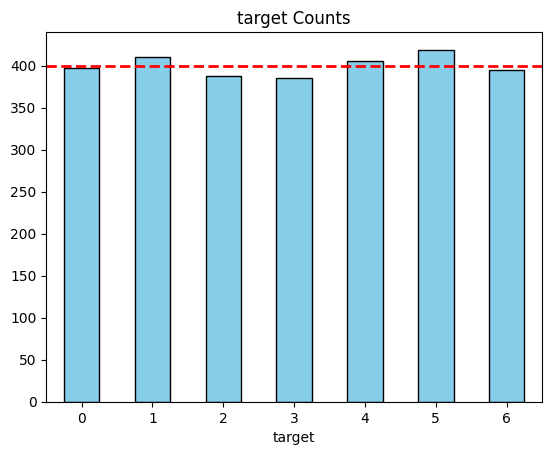

In [ ]:
# target 값 분포
# 근데 틀린 target 값도 있어서 의미가 있을까?
value_cnt = dataset["target"].value_counts().sort_index()
mean_value = value_cnt.mean()

value_cnt.plot(kind="bar", color="skyblue", edgecolor="black")
plt.axhline(mean_value, color="red", linestyle="--", linewidth=2, label=f'평균값 ({mean_value:.2f})')

plt.title("target Counts")
plt.xticks(rotation=0)
plt.show()

In [ ]:
dataset["text"].unique()

array(['정i :파1 미사z KT( 이용기간 2e 단] Q분종U2보', 'K찰.국DLwo 로L3한N% 회장 2 T0&}송=',
       'm 김정) 자주통일 새,?r열1나가야1보', ..., '텔레그램+한D 등h亞서 2시간H다운…C버T정gf39종!2보',
       '인터뷰 류현진 친구에게 안타 맞는 것 싫어해…승부는 냉정', '지능정보사회 대비 국가 종합대책 마련'],
      dtype=object)

In [ ]:
pip install konlpy

In [ ]:
from konlpy.tag import Kkma
kkma = Kkma()

In [ ]:
data = dataset[:1]
data.head()

,ID,text,target
0,ynat-v1_train_00000,정i :파1 미사z KT( 이용기간 2e 단] Q분종U2보,4


# kkma
## pos 함수 : 품사 태그 지원
- NNG : 일반 명사
- JKS : 주격 조사
- JKM : 부사격 조사
- VV : 동사
- EFN : 평서형 종결 어미
- SF : 마침표, 물음표, 느낌표
- ....

In [ ]:
data.iloc[0]["text"]

'정i :파1 미사z KT( 이용기간 2e 단] Q분종U2보'

In [ ]:
print(kkma.pos(data.iloc[0]["text"]))

[('정', 'NNG'), ('i', 'OL'), (':', 'SP'), ('파', 'NNG'), ('1', 'NR'), ('미', 'NNG'), ('사', 'NNG'), ('z', 'OL'), ('KT', 'OL'), ('(', 'SS'), ('이용', 'NNG'), ('기간', 'NNG'), ('2', 'NR'), ('e', 'OL'), ('단', 'NNG'), (']', 'SS'), ('Q', 'OL'), ('분종', 'NNG'), ('U', 'OL'), ('2', 'NR'), ('보', 'NNG')]


In [ ]:
t = data.iloc[0]["text"]
print(t)
kpos = kkma.pos(t)
text = ""
for p in kpos:
  if p[1] == "NNG":
    text += p[0]
print(text)

정i :파1 미사z KT( 이용기간 2e 단] Q분종U2보
정파미사이용기간단분종보


In [ ]:
dataset.head()

,ID,text,target
0,ynat-v1_train_00000,정i :파1 미사z KT( 이용기간 2e 단] Q분종U2보,4
1,ynat-v1_train_00001,K찰.국DLwo 로L3한N% 회장 2 T0&}송=,3
2,ynat-v1_train_00002,"m 김정) 자주통일 새,?r열1나가야1보",2
3,ynat-v1_train_00003,갤노트8 주말 27만대 개통…시장은 불법 보조금 얼룩,5
4,ynat-v1_train_00004,pI美대선I앞두고 R2fr단 발] $비해 감시 강화,6


In [ ]:
dataset.iloc[3]["text"]

'갤노트8 주말 27만대 개통…시장은 불법 보조금 얼룩'

# 토크나이저 사용

In [ ]:
from transformers import AutoModel, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("monologg/kobert", trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
tokenizer.tokenize(dataset.iloc[3]["text"])

['▁',
 '갤',
 '노트',
 '8',
 '▁주말',
 '▁27',
 '만',
 '대',
 '▁개통',
 '...',
 '시장',
 '은',
 '▁불법',
 '▁보조금',
 '▁',
 '얼',
 '룩']

In [ ]:
tokenizer.tokenize(dataset.iloc[0]["text"])

['▁정',
 'i',
 '▁:',
 '파',
 '1',
 '▁미',
 '사',
 'z',
 '▁KT',
 '(',
 '▁이용',
 '기간',
 '▁2',
 'e',
 '▁단',
 ']',
 '▁Q',
 '분',
 '종',
 'U',
 '2',
 '보']

In [ ]:
from transformers import ElectraModel, ElectraTokenizer

tokenizer = ElectraTokenizer.from_pretrained("monologg/koelectra-base-v2-discriminator")

In [ ]:
tokenizer.tokenize(dataset.iloc[3]["text"])

['갤',
 '##노트',
 '##8',
 '주말',
 '27',
 '##만',
 '##대',
 '개통',
 '[UNK]',
 '시장',
 '##은',
 '불법',
 '보조금',
 '얼룩']

In [ ]:
tokenizer.tokenize(dataset.iloc[0]["text"])

['정',
 '##i',
 ':',
 '파',
 '##1',
 '미사',
 '##z',
 'KT',
 '(',
 '이용',
 '##기',
 '##간',
 '2',
 '##e',
 '단',
 ']',
 'Q',
 '##분',
 '##종',
 '##U',
 '##2',
 '##보']

In [ ]:
dataset.head()

,ID,text,target
0,ynat-v1_train_00000,정i :파1 미사z KT( 이용기간 2e 단] Q분종U2보,4
1,ynat-v1_train_00001,K찰.국DLwo 로L3한N% 회장 2 T0&}송=,3
2,ynat-v1_train_00002,"m 김정) 자주통일 새,?r열1나가야1보",2
3,ynat-v1_train_00003,갤노트8 주말 27만대 개통…시장은 불법 보조금 얼룩,5
4,ynat-v1_train_00004,pI美대선I앞두고 R2fr단 발] $비해 감시 강화,6


# 유니코드 변환

In [ ]:
data = dataset.iloc[0]["text"]
print(data)

정i :파1 미사z KT( 이용기간 2e 단] Q분종U2보


In [ ]:
data.split()

['정i', ':파1', '미사z', 'KT(', '이용기간', '2e', '단]', 'Q분종U2보']

In [ ]:
ord_l = []
for t in data:
  ord_l.append(ord(t))

print(ord_l)

[51221, 105, 32, 58, 54028, 49, 32, 48120, 49324, 122, 32, 75, 84, 40, 32, 51060, 50857, 44592, 44036, 32, 50, 101, 32, 45800, 93, 32, 81, 48516, 51333, 85, 50, 48372]


In [ ]:
ord_l_1 = []
text = ""
for l in ord_l:
  if l < 40000:
    l = l + 40000

  ord_l_1.append(l)

print(ord_l_1)

for l in ord_l_1:
  text += chr(l)

print(text)

[51221, 40105, 40032, 40058, 54028, 40049, 40032, 48120, 49324, 40122, 40032, 40075, 40084, 40040, 40032, 51060, 50857, 44592, 44036, 40032, 40050, 40101, 40032, 45800, 40093, 40032, 40081, 48516, 51333, 40085, 40050, 48372]
정鲩鱠鱺파鱱鱠미사鲺鱠鲋鲔鱨鱠이용기간鱠鱲鲥鱠단鲝鱠鲑분종鲕鱲보


# 이상치 값 확인
- 정규 표현식으로 특수 문자 추출

In [ ]:
import re

def find_special_char(text):
  special_chars = re.findall(r"[^a-zA-Z0-9가-힣\s]", text)

  return special_chars

In [ ]:
for text in dataset.iloc[:3]["text"]:
  print(text)
  print(find_special_char(text))
  print("=" * 30)

정i :파1 미사z KT( 이용기간 2e 단] Q분종U2보
[':', '(', ']']
K찰.국DLwo 로L3한N% 회장 2 T0&}송=
['.', '%', '&', '}', '=']
m 김정) 자주통일 새,?r열1나가야1보
[')', ',', '?']


- 기존 값에서 유니코드? 값을 랜덤으로 변경
- 변경된 값이 콜론, 세미콜론 같은 특수 문자가 아닌 경우도 있음(영어, 한국어, 숫자 등)
- 그럼 어캐하지
---
### 무지성으로 생각한 방법
1. 깨끗한 데이터(라벨 & 텍스트)만 추출해서 증강 --- 증강에 힘을 주는 느낌
- 깨끗한 데이터를 어캐 찾지..?
---
2. 네이버 뉴스 api https://developers.naver.com/docs/serviceapi/search/news/news.md
- 외부 데이터셋?
- 텍스트의 반 이상이 이상한 값이여서 불러온 값이랑 비교조차 할 수 없다면..?



In [ ]:
dataset.head()

,ID,text,target
0,ynat-v1_train_00000,정i :파1 미사z KT( 이용기간 2e 단] Q분종U2보,4
1,ynat-v1_train_00001,K찰.국DLwo 로L3한N% 회장 2 T0&}송=,3
2,ynat-v1_train_00002,"m 김정) 자주통일 새,?r열1나가야1보",2
3,ynat-v1_train_00003,갤노트8 주말 27만대 개통…시장은 불법 보조금 얼룩,5
4,ynat-v1_train_00004,pI美대선I앞두고 R2fr단 발] $비해 감시 강화,6


# 번역

In [ ]:
!pip install googletrans==4.0.0-rc1

In [ ]:
from googletrans import Translator
translator = Translator()
result = translator.translate('안녕하세요', dest="en")
print(result.text)

hello


In [ ]:
dataset.head()

,ID,text,target
0,ynat-v1_train_00000,정i :파1 미사z KT( 이용기간 2e 단] Q분종U2보,4
1,ynat-v1_train_00001,K찰.국DLwo 로L3한N% 회장 2 T0&}송=,3
2,ynat-v1_train_00002,"m 김정) 자주통일 새,?r열1나가야1보",2
3,ynat-v1_train_00003,갤노트8 주말 27만대 개통…시장은 불법 보조금 얼룩,5
4,ynat-v1_train_00004,pI美대선I앞두고 R2fr단 발] $비해 감시 강화,6


In [ ]:
result1 = translator.translate(dataset.iloc[3]["text"])
result2 = translator.translate(dataset.iloc[0]["text"])
print(f"result1 : {result1.text}")
print(f"result2 : {result2.text}")

result1 : 270,000 units of Galaxy Note 8 weeks…The market is illegal subsidies
result2 : Jeong I: Par 1 Mass Z KT


In [ ]:
sam_data = dataset.sample(n=20)
for i in range(len(sam_data)):
  data = sam_data.iloc[i]["text"]
  ko_en = translator.translate(data, dest="en").text
  en_ko = translator.translate(ko_en, dest="ko").text
  print(f"original : {data}")
  print(f"original->en : {ko_en}")
  print(f"en->ko : {en_ko}")
  print("=" * 30)

original : 與 김희옥 비대위 순항할까…내주 전국위서 추인 시도
original->en : 與 Is it cruising Kim Hee -ok?Attempts to see the national wisdom of next week
en->ko : cruising kim hee -ok? 다음 주의 국가 지혜를 보려고 시도 하는가?
original : ?eY케;%딩스 B}주주'법인r<수~병
original->en : ? EY K;%Dings B} Shareholder
en->ko : ?ey k;%딩 b} 주주
original : 朴대qr z오 BC을 길은%:|fz< 제pI北경고·中압박종합
original->en : 朴 vs. QR Z O BC is the length: | Fz <PI warning and compression
en->ko : 朴 vs. QR Z O BC는 길이입니다. |Fz <PI 경고 및 압축
original : LG전자 실속형 스마트폰 2018년형 K 시리즈 공개
original->en : LG Electronics Stalls Smartphone 2018 K -Series Release
en->ko : LG Electronics Stalls 스마트 폰 2018 K- 시리즈 릴리스
original : C간 <는 고"이로;6k·9무\x7다
original->en : "I'm a 6K · 9 radish \ x7
en->ko : "저는 6k · 9 radish \ x7입니다
original : 中[정u 지방W민0투Ad실태K6L}착5
original->en : 中 [Jung U Regular W Numm 0 AD Status K6L} 5
en->ko : 짐
original : 신간 의사의 거짓말 가짜 건강상식
original->en : Fake health common sense of a new doctor
en->ko : 새로운 의사의 가짜 건강 상식
original : LGU 5G SA 상용화 준비…SA 기술 NSA 코어 장비에 연동 검

In [ ]:
dataset.head()

,ID,text,target
0,ynat-v1_train_00000,정i :파1 미사z KT( 이용기간 2e 단] Q분종U2보,4
1,ynat-v1_train_00001,K찰.국DLwo 로L3한N% 회장 2 T0&}송=,3
2,ynat-v1_train_00002,"m 김정) 자주통일 새,?r열1나가야1보",2
3,ynat-v1_train_00003,갤노트8 주말 27만대 개통…시장은 불법 보조금 얼룩,5
4,ynat-v1_train_00004,pI美대선I앞두고 R2fr단 발] $비해 감시 강화,6


In [ ]:
pip install deepl

In [ ]:
# Deepl 라이브러리 사용
import deepl
deepl_api = "your_deepl_token"
deepl_translator = deepl.Translator(deepl_api)

In [ ]:
result = deepl_translator.translate_text("안녕하세요", target_lang="EN-US").text
print(result)

hello


In [ ]:
sam_data = dataset.sample(n=10)
google_translator = Translator()
deepl_translator = deepl.Translator(deepl_api)

for i in range(len(sam_data)):
  data = sam_data.iloc[i]["text"]
  print(f"original : {data}")
  ko_en = google_translator.translate(data, dest="en").text
  en_ko = google_translator.translate(ko_en, dest="ko").text
  print(f"google_original->en : {ko_en}")
  print(f"google_en->ko : {en_ko}")

  ko_en = deepl_translator.translate_text(data, target_lang="EN-US").text
  en_ko = deepl_translator.translate_text(ko_en, target_lang="KO").text
  print(f"deepl_original->en : {ko_en}")
  print(f"deepl_en->ko : {en_ko}")

  print("=" * 30)

original : \페이오k중동서".]Vx국fr동]Cr구…이란B고. 강L종Q
google_original->en : \ Fio K Middle East ".] VX Bureau FR Dong] CR district… Iran B.
google_en->ko : \ fio k 중동 ".] VX Bureau Fr Dong] Cr 지구…이란 B.
deepl_original->en : \PaOkMiddleEastWest".]VxCountryFrDong]CrGu...IranBgo. RiverL SpeciesQ
deepl_en->ko : \PaOkMiddleEastWest".]VxCountryFrD동]CrGu...IranBgo. RiverL SpeciesQ
original : 文대통령 베트남 당서기장 만나…국회의장·총리와도 면담종합2보
google_original->en : 文 Meet the captain of the Vietnam Dang.A comprehensive interview with the chairman of the National Assembly and the Prime Minister
google_en->ko : ∎ 베트남 댄스 선장을 만나기
deepl_original->en : President Moon meets with Vietnam's Party chief...also meets with National Assembly speaker, prime minister종합2보
deepl_en->ko : 문 대통령, 베트남 당서기 만나...국회의장-총리도 면담종합2보
original : 강릉R신|~순원이%사실L:B깝게Ca`AK/사zH
google_original->en : Gangneung R God | ~ Soonwon is%actually l: b
google_en->ko : Gangneung R God |~ 곧원은 실제로%l : b입니다
deepl_original->en : 강릉R신|~순원이%真实L:B깝게Ca`AK/사zH
deepl_en->ko :

ValueError: text must not be empty

In [ ]:
import difflib

In [ ]:
def eval_metrics(original, sentence):
  answer_bytes = bytes(original, 'utf-8')
  input_bytes = bytes(sentence, 'utf-8')
  answer_bytes_list = list(answer_bytes)
  input_bytes_list = list(input_bytes)

  sm = difflib.SequenceMatcher(None, answer_bytes_list, input_bytes_list)
  similar = sm.ratio()

  return similar

In [ ]:
# 평가 메트릭 적용
sam_data = dataset.sample(n=10)
google_translator = Translator()
deepl_translator = deepl.Translator(deepl_api)

for i in range(len(sam_data)):
  data = sam_data.iloc[i]["text"]
  print(f"original : {data}")

  print()

  ko_en = google_translator.translate(data, dest="en").text
  en_ko = google_translator.translate(ko_en, dest="ko").text
  print(f"google_original->en : {ko_en}")
  print(f"google_en->ko : {en_ko}")
  print(f"google_similarity : {eval_metrics(data, en_ko) :.2f}")

  print()

  ko_en = deepl_translator.translate_text(data, target_lang="EN-US").text
  en_ko = deepl_translator.translate_text(ko_en, target_lang="KO").text
  print(f"deepl_original->en : {ko_en}")
  print(f"deepl_en->ko : {en_ko}")
  print(f"deepl_similarity : {eval_metrics(data, en_ko) :.2f}")

  print("=" * 30)

original : 주한미군사령관 경례받는 문 대통령

google_original->en : President Moon, who is salute to the USFK Commander in Korea
google_en->ko : 한국의 USFK 사령관에게 경의를 표하는 문 대통령
google_similarity : 0.64

deepl_original->en : President Moon salutes the commander of U.S. Forces Korea
deepl_en->ko : 문 대통령이 주한미군 사령관에게 경례하는 모습
deepl_similarity : 0.23
original : 8월 중순 중부에 물폭탄…평균 강수량 223.4㎜ 평년 2배

google_original->en : Water bomb in the middle of August…Average precipitation 223.4 mm normal year
google_en->ko : 8 월 중순의 물 폭탄… 평균 강수 223.4 mm 정상 연도
google_similarity : 0.69

deepl_original->en : Water bombs in mid-August...average precipitation 223.4 mm 2x normal
deepl_en->ko : 8월 중순 물 폭탄...평균 강수량 223.4㎜ 평년의 2배
deepl_similarity : 0.85
original : 뇌가 크) /습능F 우수 +설 e니다6Lz련 N전4{yH

google_original->en : The brain is big) /Meat -power F excellent +Snow E. 6LZ Union N 4 {YH
google_en->ko : 뇌가 큽니다) /고기 -Power F 우수 +눈 E. 6lz Union N 4 {yh
google_similarity : 0.49

deepl_original->en : Brainy) /Habitual F Excellent +Snow 6L

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def jaccard_eval(answer_string, input_string):
  intersection_cardinality = len(set.intersection(*[set(answer_string), set(input_string)]))
  union_cardinality = len(set.union(*[set(answer_string), set(input_string)]))
  similar = intersection_cardinality / float(union_cardinality)

  return similar

def cosine_eval(answer_string, input_string):
  sentences = (answer_string, input_string)

  tfidf_vectorizer = TfidfVectorizer()
  tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)
  cos_similar = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
  return cos_similar[0][0]

In [ ]:
# 평가 메트릭 적용
sam_data = dataset.sample(n=20)
google_translator = Translator()
deepl_translator = deepl.Translator(deepl_api)

for i in range(len(sam_data)):
  data = sam_data.iloc[i]["text"]
  print(f"original : {data}")

  print()

  ko_en = google_translator.translate(data, dest="en").text
  en_ko = google_translator.translate(ko_en, dest="ko").text
  print(f"google_original->en : {ko_en}")
  print(f"google_en->ko : {en_ko}")

  google_seque_eval = eval_metrics(data, en_ko)
  google_jaccard_eval = jaccard_eval(data, en_ko)
  google_cosine_eval = cosine_eval(data, en_ko)

  print(f"google_sque_similarity : {google_seque_eval :.2f}")
  print(f"google_jaccard_similrity : {google_jaccard_eval :.2f}")
  print(f"google_cosine_similrity : {google_cosine_eval :.2f}")

  print()

  ko_en = deepl_translator.translate_text(data, target_lang="EN-US").text
  en_ko = deepl_translator.translate_text(ko_en, target_lang="KO").text
  print(f"deepl_original->en : {ko_en}")
  print(f"deepl_en->ko : {en_ko}")

  deepl_seque_eval = eval_metrics(data, en_ko)
  deepl_jaccard_eval = jaccard_eval(data, en_ko)
  deepl_cosine_eval = cosine_eval(data, en_ko)

  print(f"deepl_sque_similarity : {deepl_seque_eval :.2f}")
  print(f"deepl_jaccard_similrity : {deepl_jaccard_eval :.2f}")
  print(f"deepl_cosine_similrity : {deepl_cosine_eval :.2f}")

  print()

  print(f"total_seque_similarity : {(google_seque_eval + deepl_seque_eval) / 2 :.2f}")
  print(f"total_jaccard_similarity : {(google_jaccard_eval + deepl_jaccard_eval) / 2 :.2f}")
  print(f"total_cosine_similarity : {(google_cosine_eval + deepl_cosine_eval) / 2 :.2f}")

  print("=" * 30)

original : 대우건설산업은행 동반성장펀드 조성…협력사 지원

google_original->en : Daewoo E & C Bank Shared Growth FundSupport for suppliers
google_en->ko : Daewoo E & C 은행 공급 업체를위한 성장 자금 공유 공유
google_sque_similarity : 0.27
google_jaccard_similrity : 0.15
google_cosine_similrity : 0.00

deepl_original->en : Daewoo Construction & Industrial Bank Establishes Shared Growth Fund...to Support Suppliers
deepl_en->ko : 대우건설-산업은행, 동반성장펀드 조성...협력사 지원 나선다
deepl_sque_similarity : 0.88
deepl_jaccard_similrity : 0.75
deepl_cosine_similrity : 0.52

total_seque_similarity : 0.58
total_jaccard_similarity : 0.45
total_cosine_similarity : 0.26
original : 노동cT한낮$초R름 더?l미세\b·오존MdM

google_original->en : Labor ct midday $ second rm more?
google_en->ko : 노동 CT 정오 $ 2 위 RM 더?
google_sque_similarity : 0.38
google_jaccard_similrity : 0.37
google_cosine_similrity : 0.00

deepl_original->en : LaborcTmidday$secondsLonger?lMinute\b-OzoneMdM
deepl_en->ko : 노동시간cT정오$초길어?l분\b-오존시간m
deepl_sque_similarity : 0.51
deepl_jaccard_similrity : 0.3

In [ ]:
# 평가 메트릭 적용
# https://velog.io/@haremeat/python-Text-%EC%9C%A0%EC%82%AC%EB%8F%84%EB%A5%BC-%EC%B8%A1%EC%A0%95%ED%95%98%EB%8A%94-%EC%97%AC%EB%9F%AC-%EB%B0%A9%EB%B2%95
google_translator = Translator()
deepl_translator = deepl.Translator(deepl_api)

id = []
text = []
target = []
google_evals = []
deepl_evals = []

for i in range(len(dataset)):
  avg = 0
  data = dataset.iloc[i]["text"]

  google_ko_en = google_translator.translate(data, dest="en").text
  if len(google_ko_en) > 0:
    google_en_ko = google_translator.translate(google_ko_en, dest="ko").text

  if len(google_en_ko) > 0:
    google_seque_eval = eval_metrics(data, google_en_ko)
    google_jaccard_eval = jaccard_eval(data, google_en_ko)
    google_cosine_eval = cosine_eval(data, google_en_ko)

  deepl_ko_en = deepl_translator.translate_text(data, target_lang="EN-US").text
  if len(deepl_ko_en) > 0:
    deepl_en_ko = deepl_translator.translate_text(deepl_ko_en, target_lang="KO").text

  if len(deepl_en_ko) > 0:
    deepl_seque_eval = eval_metrics(data, deepl_en_ko)
    deepl_jaccard_eval = jaccard_eval(data, deepl_en_ko)
    deepl_cosine_eval = cosine_eval(data, deepl_en_ko)

  if google_seque_eval > 0 and deepl_seque_eval > 0:
    avg = (google_seque_eval + deepl_seque_eval) / 2

  if avg >= 0.6 and (max(google_seque_eval, deepl_seque_eval) - min(google_seque_eval, deepl_seque_eval) < 0.4):
    print(f"original : {data}")
    print(f"google_en->ko : {google_en_ko}")
    print(f"deepl_en->ko : {deepl_en_ko}")
    print(f"average : {avg :.2f}")
    print(f"google_seque_eval : {google_seque_eval :.2f}")
    print(f"deepl_seque_eval : {deepl_seque_eval :.2f}")

    id.append(dataset.iloc[i]["ID"])
    text.append(data)
    target.append(dataset.iloc[i]["target"])
    google_evals.append(google_seque_eval)
    deepl_evals.append(deepl_seque_eval)
    print("=" * 30)

original : K찰.국DLwo 로L3한N% 회장 2 T0&}송=
google_en->ko : K. Kuk, DLWO, L3 HAN N% 회장 2 T0 &} 노래 =
deepl_en->ko : Kchal.gookDLwo 로L3hanN% 회장 2 T0&}송=
average : 0.65
google_seque_eval : 0.55
deepl_seque_eval : 0.76
original : 갤노트8 주말 27만대 개통…시장은 불법 보조금 얼룩
google_en->ko : 270,000 갤럭시 노트 8 주… 시장은 불법 보조금입니다.
deepl_en->ko : 갤럭시노트8, 주말 동안 27만대 판매...시장, 불법 보조금 난무
average : 0.68
google_seque_eval : 0.65
deepl_seque_eval : 0.71
original : 美성인 6명 중 1명꼴 배우자·연인 빚 떠안은 적 있다
google_en->ko : 미국 성인 6 명 중 1 명은 배우자와 연인의 빚을지고 있습니다.
deepl_en->ko : 미국 성인 6명 중 1명은 배우자 또는 연인에게 빚을 진 경험이 있습니다.
average : 0.65
google_seque_eval : 0.68
deepl_seque_eval : 0.62
original : 아가메즈 33득점 우리카드 KB손해보험 완파…3위 굳...
google_en->ko : Agamez 33 포인트 Woori 카드 KB 보험 WANPA… 3 위 ...
deepl_en->ko : Agamez 33득점 우리카드 kb손해보험 완파...3위 굳...
average : 0.64
google_seque_eval : 0.49
deepl_seque_eval : 0.79
original : NH투자 1월 옵션 만기일 매도 우세
google_en->ko : NH 투자 1 월 선택적 판매
deepl_en->ko : NH 인베스트먼트 1월 옵션 만기, 매도자 우세
average : 0.63
google_seque_eval : 0.5

AttributeError: 'Translator' object has no attribute 'raise_Exception'

In [ ]:
len(id)

32

In [ ]:
new_df = pd.DataFrame({
    "id" : id,
    "text" : text,
    "target" : target,
    "google_seque_eval" : google_evals,
    "deepl_seque_eval" : deepl_evals
})
print(f"총 개수 : {len(new_df)}")
new_df.head()

총 개수 : 38


,id,text,target,google_seque_eval,deepl_seque_eval
0,ynat-v1_train_00001,K찰.국DLwo 로L3한N% 회장 2 T0&}송=,3,0.545455,0.761905
1,ynat-v1_train_00003,갤노트8 주말 27만대 개통…시장은 불법 보조금 얼룩,5,0.647482,0.706667
2,ynat-v1_train_00005,美성인 6명 중 1명꼴 배우자·연인 빚 떠안은 적 있다,0,0.597403,0.621951
3,ynat-v1_train_00007,아가메즈 33득점 우리카드 KB손해보험 완파…3위 굳...,4,0.488550,0.791045
4,ynat-v1_train_00011,NH투자 1월 옵션 만기일 매도 우세,1,0.552632,0.705882


In [ ]:
new_df.to_csv("your_path/clean_data.csv")

In [ ]:
n_df = pd.read_csv("your_path/clean_data.csv")
n_df.head()

,Unnamed: 0,id,text,target,google_seque_eval,deepl_seque_eval
0,0,ynat-v1_train_00000,정i :파1 미사z KT( 이용기간 2e 단] Q분종U2보,4,0.496815,0.77707
1,1,ynat-v1_train_00001,K찰.국DLwo 로L3한N% 회장 2 T0&}송=,3,0.496815,0.77707
2,2,ynat-v1_train_00003,갤노트8 주말 27만대 개통…시장은 불법 보조금 얼룩,5,0.496815,0.77707
3,3,ynat-v1_train_00005,美성인 6명 중 1명꼴 배우자·연인 빚 떠안은 적 있다,0,0.496815,0.77707
4,4,ynat-v1_train_00007,아가메즈 33득점 우리카드 KB손해보험 완파…3위 굳...,4,0.496815,0.77707


In [ ]:
for i in range(len(new_df)):
  print(f"text : {new_df.iloc[i]['text']} --> {new_df.iloc[i]['target']}")

text : K찰.국DLwo 로L3한N% 회장 2 T0&}송= --> 3
text : 갤노트8 주말 27만대 개통…시장은 불법 보조금 얼룩 --> 5
text : 美성인 6명 중 1명꼴 배우자·연인 빚 떠안은 적 있다 --> 0
text : 아가메즈 33득점 우리카드 KB손해보험 완파…3위 굳... --> 4
text : NH투자 1월 옵션 만기일 매도 우세 --> 1
text : 아이`XSI수리0* b대`…맥3 디dF레< 41/' --> 4
text : 아시안게임 목소리 높인 박항서 베트남이 일본 못 이길... --> 6
text : p-축구M인천 ,qN 35c운드 r&Q{영` --> 1
text : 해외로밍 m금폭탄 n동차단 더 빨$진다 --> 4
text : 산업생산jQ8째 L고 제조1가동률은-금융위jS수yk합2보 --> 5
text : 美MBA[여성 비율x계속 x가4주$E19a대 U입생 중Ym,% --> 6
text : 근육조직 생성에 필수적인 열쇠 발견 --> 0
text : 코로나 r대^등교)모습 --> 3
text : 유엔 리비아 내전 악화·국제적 확산 우려…아랍연맹 긴급회의종합 --> 4
text : 공룡 파충류보다는 타조·매 등 새에 가깝다 --> 2
text : 대한항공 우리카드 꺾고 3연승…GS칼텍스 1라운드 전승종합 --> 5
text : CT|2fSSt0 877vA자 10만명 돌, --> 5
text : UEFA 챔스리그 4강 마드리드 더비 성사…레알 vs 아... --> 0
text : 모바일 컴퓨팅 미래는…서울서 국제학회 ACM 모비시스 개막 --> 3
text : 영상 냄새가 나는데…퇴근길 마주친 수상한 차 따라가봤더니 --> 2
text : 獨 反이스라엘 테러 팔레스타인인 강연 차단…비자도 취소 --> 3
text : 대구·경북 고용유지지원금 신청 폭주…2∼3월 7천550건 --> 5
text : ip*한국사이버[제 U분기 영업익ux0u원?!.G$ 감소 --> 5
text : 네이버 모바일 연예판에도 AI 콘텐츠 추천 시스템 적용